<a href="https://colab.research.google.com/github/Diacod-I/ActivateFunk/blob/main/Activate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation functions

This notebook contains a comparative study of activation functions. We will be understanding the underlying math of common activation functions used in ANNs and for classifcation problems, identifying thier pros and cons, thier relationship with one and other and which activation function is most viable in general.

Following are the necessary modules needed for this analysis notebook.

In [1]:
import matplotlib.pyplot as plt
from math import exp,log
import numpy as np
plt.style.use('dark_background')

In [2]:
x=np.linspace(-20,20,num=1000)

## Binary Step Function

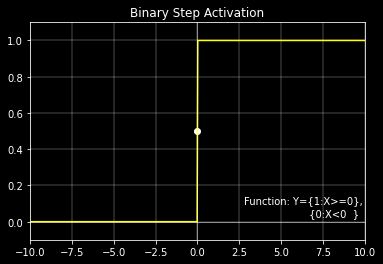

In [23]:
f = np.vectorize(lambda x: 1 if x>0 else 0)
plt.title("Binary Step Activation")
plt.plot(x,f(x),c='yellow')
plt.text(2.8,0.1,"Function: Y={1:X>=0},")
plt.text(6.5,0.03," {0:X<0  }")
plt.scatter(0,0.5,c='white')
plt.axhline(0, color='white', linewidth=0.5)
plt.axvline(0, color='white', linewidth=0.5)
plt.xlim(-10,10)
plt.ylim(-0.1,1.1)
plt.grid(linewidth=0.3)
plt.show()

## Linear Activation Function

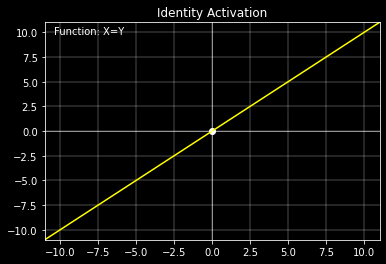

In [24]:
y=x
plt.plot(x,y,c='yellow')
plt.text(-10.4,9.8,"Function: X=Y")
plt.scatter(0,0,c='white')
plt.axhline(0, color='white', linewidth=0.5)
plt.axvline(0, color='white', linewidth=0.5)
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.title("Identity Activation")
plt.grid(linewidth=0.3)
plt.show()

## Non-Linear Activation Functions

### Sigmoid Function

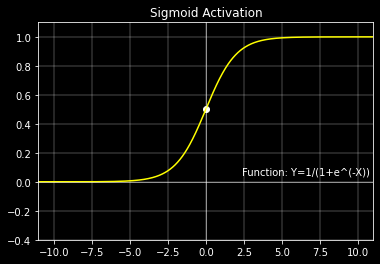

In [26]:
f = np.vectorize(lambda x: 1/(1+exp(-x)))
plt.title("Sigmoid Activation")
plt.plot(x,f(x),c='yellow')
plt.text(2.4,0.05,"Function: Y=1/(1+e^(-X))")
plt.scatter(0,0.5,c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.xlim(-11,11)
plt.ylim(-0.4,1.1)
plt.grid(linewidth=0.3)
plt.show()

### SoftMax Activation

SoftMax Activation is used for multiclass classifcation problems. This is used instead of sigmoid function as sigmoid function is much better for binary classification.<br><br>The reason being sigmoid is not viable for finding multiclass probability distributions and SoftMax functions uses the exponential on all feature vectors individually and finds the probability of each feature in comparison to all other features.<br><br>You can refer this article for further information: ["Common W article from TowardsDataScience"](https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9#:~:text=Sigmoid%20is%20used%20for%20binary,extension%20of%20the%20Sigmoid%20function.)

### Hyperbolic Tangent Function (TanH)

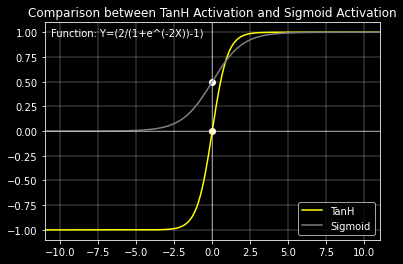

In [27]:
f=np.vectorize(lambda x:(2/(1+exp(-2*x))-1))
plt.title("Comparison between TanH Activation and Sigmoid Activation")
plt.plot(x,f(x),c='yellow')
g = np.vectorize(lambda x: 1/(1+exp(-x)))
plt.plot(x,g(x),c='grey')
plt.scatter(0,0,c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.scatter(0,g(0),c='white')
plt.xlim(-11,11)
plt.ylim(-1.1,1.1)
plt.text(-10.6,0.97,"Function: Y=(2/(1+e^(-2X))-1)")
plt.legend(['TanH','Sigmoid'],loc='lower right')
plt.grid(linewidth=0.3)
plt.show()

### Rectified Linear Unit Function (ReLU)

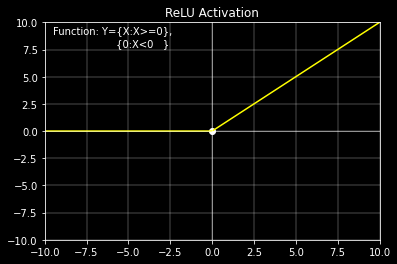

In [28]:
y=np.vectorize(lambda x: x if x>0 else 0,otypes=[np.float64]) 
plt.title("ReLU Activation")
plt.plot(x,y(x),c='yellow')
plt.text(-9.5,9,"Function: Y={X:X>=0},")
plt.text(-5.9,7.8," {0:X<0   }")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(0,0,c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.grid(linewidth=0.3)
plt.show()

### Leaky Rectified Linear Unit Function (Leaky ReLU)

This is a modified version of the original ReLU activation function.<br> In the leaky ReLU, instead of setting y values of negative x values to 0, we have a new parameter ***α*** which we multiply with x and set as the coressponding y value. When value of ***α*** is 0.01, it is the ***Leaky ReLU***. If it isn't, this activation function is called **Randomized or Parametric ReLU**.

Input the alpha parameter:
0.5
Parameter α = 0.5


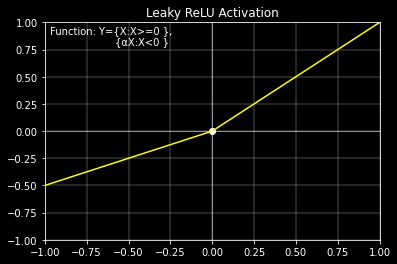

In [29]:
print("Input the alpha parameter:")
alpha=float((input()) or 0.01)
print("Parameter α =",alpha)
y=np.vectorize(lambda x: alpha*x if x<0 else x,otypes=[np.float64])
plt.title("Leaky ReLU Activation")
plt.plot(x,y(x),c='yellow')
plt.scatter(0,0,c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.text(-0.97,0.9,"Function: Y={X:X>=0 },")
plt.text(-0.58,0.8,"{αX:X<0 }")
plt.grid(linewidth=0.3)
plt.show()

### SoftPlus Activation

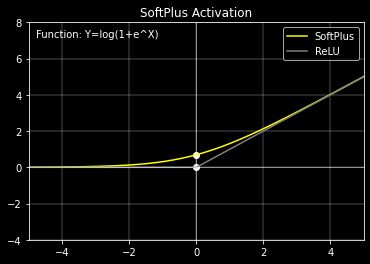

In [30]:
f=np.vectorize(lambda x: log(1+exp(x)))
g=np.vectorize(lambda x: 0 if x<0 else x ,otypes=[np.float64])
plt.plot(x,f(x),c='yellow')
plt.plot(x,g(x),c='grey')
plt.title("SoftPlus Activation")
plt.xlim((-5, 5))
plt.ylim(-4,8)
plt.scatter(0,f(0),c='white')
plt.scatter(0,0,c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.text(-4.8,7.2,"Function: Y=log(1+e^X)")
plt.legend(['SoftPlus','ReLU'])
plt.grid(linewidth=0.3)
plt.show()

### Exponential Linear Unit Activation (ELU)
When the parameter ***α*** is 1, this function is called the exponential linear unit activation function or ELU. Otherwise, this is called the Scaled Exponential Linear unit or SELU.

Input the alpha parameter:
0.5
Parameter α = 0.5


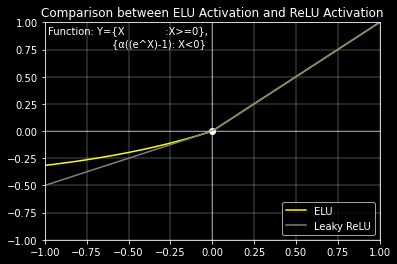

In [31]:
print("Input the alpha parameter:")
alpha=float((input()) or 0.01)
print("Parameter α =",alpha)
y=np.vectorize(lambda x: alpha*((exp(x))-1) if x<0 else x,otypes=[np.float64])
z=np.vectorize(lambda x: alpha*x if x<0 else x,otypes=[np.float64])
plt.title("Comparison between ELU Activation and ReLU Activation")
plt.plot(x,y(x),c='yellow')
plt.plot(x,z(x),c='grey')
plt.scatter(0,0,c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.text(-0.98,0.9,"Function: Y={X             :X>=0},")
plt.text(-0.6,0.78,"{α((e^X)-1): X<0}")
plt.legend(['ELU','Leaky ReLU'],loc='lower right')
plt.grid(linewidth=0.3)
plt.show()

### Sigmoid Linear Unit (SiLU)

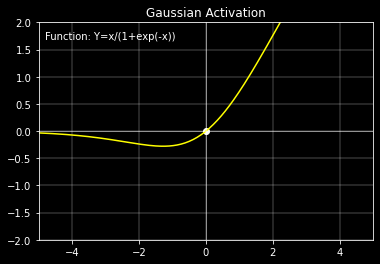

In [32]:
f=np.vectorize(lambda x: x/(1+exp(-x)))
plt.plot(x,f(x),c='yellow')
plt.title("Gaussian Activation")
plt.xlim((-5, 5))
plt.ylim(-2,2)
plt.scatter(0,f(0),c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.text(-4.8,1.7,"Function: Y=x/(1+exp(-x))")
plt.grid(linewidth=0.3)
plt.show()

### Gaussian Activation

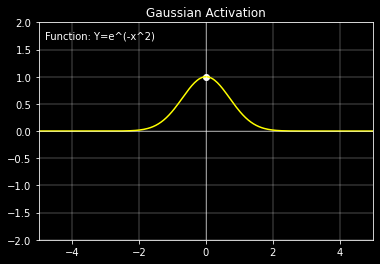

In [33]:
f=np.vectorize(lambda x: exp(-(x**2)))
plt.plot(x,f(x),c='yellow')
plt.title("Gaussian Activation")
plt.xlim((-5, 5))
plt.ylim(-2,2)
plt.scatter(0,f(0),c='white')
plt.axhline(0, color='white', linewidth=.5)
plt.axvline(0, color='white', linewidth=.5)
plt.text(-4.8,1.7,"Function: Y=e^(-x^2)")
plt.grid(linewidth=0.3)
plt.show()